In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1250]:
df = pd.read_csv('../dataset/train/train.csv')

In [202]:
df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}","{'word': '대안신당', 'start_idx': 14, 'end_idx': 17, 'type': 'ORG'}",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}","{'word': '박정부', 'start_idx': 22, 'end_idx': 24, 'type': 'PER'}",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8번으로 배정되었다.,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}","{'word': '1967', 'start_idx': 0, 'end_idx': 3, 'type': 'DAT'}",no_relation,wikipedia


In [203]:
labels = df.label.unique()

In [204]:
df.source.unique()

array(['wikipedia', 'wikitree', 'policy_briefing'], dtype=object)

In [205]:
df.source.value_counts()

wikipedia          21620
wikitree           10672
policy_briefing      178
Name: source, dtype: int64

In [206]:
type(labels)

numpy.ndarray

In [207]:
labels

array(['no_relation', 'org:member_of', 'org:top_members/employees',
       'org:alternate_names', 'per:date_of_birth',
       'org:place_of_headquarters', 'per:employee_of', 'per:origin',
       'per:title', 'org:members', 'per:schools_attended',
       'per:colleagues', 'per:alternate_names', 'per:spouse',
       'org:founded_by', 'org:political/religious_affiliation',
       'per:children', 'org:founded', 'org:number_of_employees/members',
       'per:place_of_birth', 'org:dissolved', 'per:parents',
       'per:religion', 'per:date_of_death', 'per:place_of_residence',
       'per:other_family', 'org:product', 'per:siblings', 'per:product',
       'per:place_of_death'], dtype=object)

In [208]:
values = df.label.value_counts()

In [209]:
type(values)

pandas.core.series.Series

In [210]:
values

no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

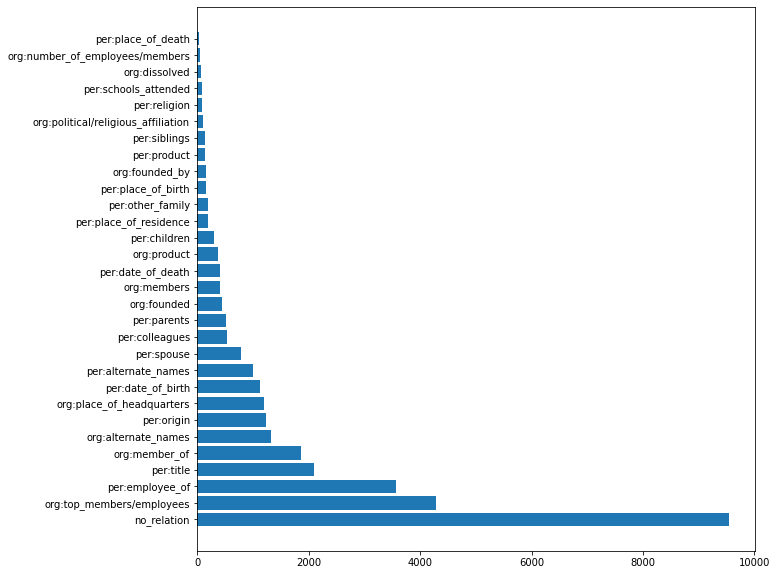

In [473]:
plt.figure(figsize=(10, 10))
plt.barh(values.index, values)
plt.show()

In [335]:
pd.set_option('display.max_colwidth', None)

In [336]:
df.sentence[df.label=='per:place_of_death'].values

array(['2010년 3월 29일, 최진영은 서울특별시 강남구 논현동의 자택에서 스스로 세상을 떠났다.',
       '막시밀리아노 1세(Maximiliano I, 1832년 7월 6일 오스트리아 빈 ~ 1867년 6월 19일 멕시코 케레타로 근처)는 오스트리아의 대공이자 멕시코 제국의 황제이다.',
       '을미사변 때 훈련대 병력을 동원하여 명성황후를 시해하는 데 동참했던 당시 조선훈련대 제2대대장 우범선(禹範善)은 이후 일본에 망명하였는데, 그 후 고영근은 1898년 일본으로 건너가 우연찮게도 대한제국 조선인 망명객 출신인 윤효정과 만나 명성황후 암살 사건 관련 담화 등을 밀담하였고 결국 1903년 11월 24일 일본 히로시마현 구레에 소재했던 자신의 객저(집)로 우범선을 초대한 후 칼로 목과 턱을 찔러 우범선을 살해하였다.',
       '마리 드 메디시스 왕비는 1630년 그녀의 아들이었던 루이 13세에 의해 추방당하게 되며 1642년 루벤스가 유년시절을 보냈던 쾰른의 바로 그 집에서 죽었다.',
       '1921년 6월 자유시참변(自由市慘變) 발생 후 상해파 고려공산당의 간부들이 거의 러시아로 이동하여 이르쿠츠크집단과의 군권투쟁을 벌이고 있을 때, 운송책의 한 사람이었던 김립은 혼자서 상해본부를 지키고 있었으며, 1921년 말 임시정부에서 보낸 김구의 부하인 오면직, 노종균 등 청년들이 김립을 찾아 1922년 2월 11일 상하이 불조계의 자베이(閘北) 거리에서 암살당했다.',
       '병을 얻은 트라야누스는 하드리아누스를 대신 파르티아 원정군의 사령관으로 임명하고 로마로 돌아가지만, 도중에 킬리키아 지방의 세리누스에서 사망하고 만다.',
       '김창완과 그의 두 형제들로 구성되었던 그룹 산울림의 멤버이자 3형제 중 막내였던 김창익이 2008년 1월 캐나다 벤쿠버에서 제설작업 도중 사고로 사망하게 되었고, 같은 해 김창완은 산울림의 공식활동 중단소식과 아울러 젊은 연주자 4명과 함께 팀을 꾸려 음악활동을 시작하겠다는 소식

In [214]:
submission = pd.read_csv('./prediction/submission.csv')

In [215]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7765 entries, 0 to 7764
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7765 non-null   int64 
 1   pred_label  7765 non-null   object
 2   probs       7765 non-null   object
dtypes: int64(1), object(2)
memory usage: 182.1+ KB


In [216]:
submission.pred_label

0                     org:product
1             per:alternate_names
2                     no_relation
3                     no_relation
4       org:top_members/employees
                  ...            
7760    org:place_of_headquarters
7761                  no_relation
7762    org:top_members/employees
7763                  no_relation
7764                  no_relation
Name: pred_label, Length: 7765, dtype: object

In [217]:
submission.pred_label.value_counts()

no_relation                            4393
per:title                               769
org:top_members/employees               443
per:employee_of                         318
org:place_of_headquarters               309
org:product                             202
per:origin                              155
per:place_of_residence                  135
org:member_of                           117
per:alternate_names                     114
org:members                             112
per:colleagues                          108
org:alternate_names                      86
per:product                              82
per:spouse                               81
per:parents                              56
per:children                             49
per:siblings                             32
org:founded                              26
per:date_of_death                        25
per:other_family                         25
org:number_of_employees/members          23
per:place_of_birth              

In [218]:
test = pd.read_csv('../dataset/test/test_data.csv')

In [219]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7765 entries, 0 to 7764
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7765 non-null   int64 
 1   sentence        7765 non-null   object
 2   subject_entity  7765 non-null   object
 3   object_entity   7765 non-null   object
 4   label           7765 non-null   int64 
 5   source          7765 non-null   object
dtypes: int64(2), object(4)
memory usage: 364.1+ KB


In [220]:
test.sentence[submission.pred_label=='org:founded_by'].values

array(['다크홈은 머슬 바운드 프로덕션(Muscle Bound Production)을 설립하여, 스스로 감독으로서 《라커룸의 제왕》(The Lords of the Lockroom), 《하우스 오브 디텐션》(House of Detention)는 작품을 찍고 계속 활동을 하였다.',
       '학교 설립에 필요한 재원으로는 이승만이 설립 운영하였던 한인기독학원(Korea Christian Institute)을 처분한 대금과, 하와이 교포들의 성금, 그리고 한국 거주민들의 성금 및 국고 보조 등을 기금으로 하고, 인천시로부터 교지를 기증받아 1954년 2월 ‘재단법인 인하학원’의 설립이 이루어짐으로써 금속, 기계, 광산, 전기, 조선, 화학공학 등 6개 학과가 설치되고, 1954년 4월 24일 인하공과대학으로 개교를 하였다.',
       '성 도미니코(1170년 8월 8일 - 1221년 8월 6일)는 스페인의 그리스도교 성직자이자 도미니코회의 창설자이다.',
       '밀양 동화학교 수학 중 일제에 의해 학교가 폐교되자 서울중앙학교에서 수학중 1919년 3.1 독립만세운동에 가담하였으며 이후 조국의 독립을 위해 중국으로 망명하여, 우당 이회영이 중국 길림성에 설립한 신흥무관 학교에서 수학했다.',
       '2012년 5월, 함께 일해왔던 남편과 이혼하고 (주) 센슈 기획과의 업무 제휴가 종료되면서, 김연자가 직접 대표가 되어 일본에 새 회사(YJKcompany)를 설립하였다.',
       '고(故) 김수연 선생은 학성강당을 설립하고 70여년의 세월 동안 1만여명의 제자를 배출⋅육성했으며 이러한 공로로 2003년 KBS 전북의 어른상, 2005년 국무총리상, 2013년 국민훈장 석류장 등을 수상했다.',
       '졸업 후 박흥식이 만든 조선비행기공업주식회사에 기술자로 취직하여 중국 봉천(현재의 심양)에서 제품을 검사하는 일을 하다가 광복을 맞이 하였다.',
       '미주리주 세인트루이스에서 짧은 시간 동안 법률을 실천한 후, 브랜다

In [221]:
test_labels = submission.pred_label.value_counts().index
test_labels

Index(['no_relation', 'per:title', 'org:top_members/employees',
       'per:employee_of', 'org:place_of_headquarters', 'org:product',
       'per:origin', 'per:place_of_residence', 'org:member_of',
       'per:alternate_names', 'org:members', 'per:colleagues',
       'org:alternate_names', 'per:product', 'per:spouse', 'per:parents',
       'per:children', 'per:siblings', 'org:founded', 'per:date_of_death',
       'per:other_family', 'org:number_of_employees/members',
       'per:place_of_birth', 'org:political/religious_affiliation',
       'per:date_of_birth', 'per:place_of_death', 'per:schools_attended',
       'per:religion', 'org:dissolved', 'org:founded_by'],
      dtype='object')

In [1287]:
for label in test_labels:
    print(label, '\n')
    print(test[['sentence', 'subject_entity', 'object_entity']][submission.pred_label==label].head(3).values)
    print('\n')

no_relation 

[['한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으로 편성될 예정이었는데 제작비 문제 때문에 연출자 고석만 PD(당시 단막극 팀장)가 MBC에 지원을 요청했지만 거절당한 데다 MBC가 경찰과의 관계 약화를 염려하여 제작을 달갑지 않게 여겼고 이 과정에서 연출자가 1995년 3월 29일 MBC에 사표를 제출한 후 프리랜서를 선언하여 편성이 무산됐으며 고석만 PD는 의 제작과 관련한 MBC와의 마찰 외에도 1994년 10월 "평프로듀서로 일하고 싶다"며 당시 맡고 있던 단막극 책임PD(종합병원 전원일기 등등) 보직 사퇴의사를 밝혔지만 MBC 측의 반대로 무산되자 프리랜서를 선언했다.'
  "{'word': '경찰', 'start_idx': 121, 'end_idx': 122, 'type': 'ORG'}"
  "{'word': '1995년', 'start_idx': 31, 'end_idx': 35, 'type': 'DAT'}"]
 ["정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하였는데, 김질의 죄는 만번 죽어 마땅합니다.'라고 하니, 세조가 특별히 김질을 사면하였다."
  "{'word': '세조', 'start_idx': 78, 'end_idx': 79, 'type': 'PER'}"
  "{'word': '정창손', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}"]
 ['미국은 필리핀 측에서는 동맹이 아니라 지배자가 되었다고 볼 수 있기 때문에, 필리핀 군대와 미국 군대의 관계는 극도로 긴박한 것이었다.'
  "{'word': '필리핀', 'start_idx': 4, 'end_idx': 6, 'type': 'ORG'}"
  "{'word': '미국', 'start_idx': 0, 'end_idx': 1, 'type': 'ORG'}"]]


per:title 

[['광산구 관계자는 “청년들이 시민과 호흡하며 지역을 대표하는 예술인으

In [223]:
test[['sentence', 'subject_entity', 'object_entity']][submission.pred_label=='org:founded_by'].values

array([['다크홈은 머슬 바운드 프로덕션(Muscle Bound Production)을 설립하여, 스스로 감독으로서 《라커룸의 제왕》(The Lords of the Lockroom), 《하우스 오브 디텐션》(House of Detention)는 작품을 찍고 계속 활동을 하였다.',
        "{'word': 'Muscle Bound Production', 'start_idx': 17, 'end_idx': 39, 'type': 'ORG'}",
        "{'word': '다크홈', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}"],
       ['학교 설립에 필요한 재원으로는 이승만이 설립 운영하였던 한인기독학원(Korea Christian Institute)을 처분한 대금과, 하와이 교포들의 성금, 그리고 한국 거주민들의 성금 및 국고 보조 등을 기금으로 하고, 인천시로부터 교지를 기증받아 1954년 2월 ‘재단법인 인하학원’의 설립이 이루어짐으로써 금속, 기계, 광산, 전기, 조선, 화학공학 등 6개 학과가 설치되고, 1954년 4월 24일 인하공과대학으로 개교를 하였다.',
        "{'word': '한인기독학원', 'start_idx': 31, 'end_idx': 36, 'type': 'ORG'}",
        "{'word': '이승만', 'start_idx': 17, 'end_idx': 19, 'type': 'PER'}"],
       ['성 도미니코(1170년 8월 8일 - 1221년 8월 6일)는 스페인의 그리스도교 성직자이자 도미니코회의 창설자이다.',
        "{'word': '도미니코회', 'start_idx': 52, 'end_idx': 56, 'type': 'ORG'}",
        "{'word': '성 도미니코', 'start_idx': 0, 'end_idx': 5, 'type': 'PER'}"],
       ['밀양 동화학교 수학 중 일제에 의해 학교가 폐교

In [224]:
import re

In [285]:
spec_dict = {}


for sen in df.sentence[:]:
    spec = re.findall(r"\W", sen)
    #print(*spec, sep="")
    spec_list = re.findall(r"[^가-힣]", "".join(spec))
    for c in spec_list:
        if c in spec_dict:
            spec_dict[c] += 1
        else:
            spec_dict[c] = 1

print(spec_dict)
print(len(spec_dict))

{'〈': 185, '〉': 191, ' ': 637757, '《': 934, '》': 926, '.': 36210, '·': 2943, '(': 19211, ')': 19190, '‘': 2190, '’': 2189, ':': 673, ',': 37642, '~': 3159, "'": 6148, '-': 3025, '“': 1988, '”': 1964, '"': 5408, '㈜': 209, '‧': 139, '↔': 2, '▲': 242, '%': 981, '/': 245, '&': 219, '!': 134, '–': 86, ';': 60, '=': 15, '→': 21, '€': 29, '△': 203, '*': 15, '｢': 10, '｣': 10, '★': 3, '>': 2, '․': 110, '「': 98, '」': 98, '・': 36, 'Ⓐ': 6, '•': 8, '☎': 24, '[': 349, ']': 344, '㎞': 8, '☆': 2, '`': 35, '※': 4, '|': 36, '『': 28, '』': 28, '。': 2, '˘': 2, '，': 4, '＇': 1, '∼': 34, '㎡': 12, '́': 2, '：': 6, '⸱': 3, '∞': 3, '♥': 5, '･': 11, '⋅': 2, '⟪': 7, '⟫': 7, '～': 4, '£': 7, '{': 3, '}': 3, '°': 2, '˹': 2, '˼': 2, '▴': 3, '℃': 2, '㎏': 2, '（': 3, '）': 2, '∙': 12, '♡': 2, '$': 8, '㎖': 1, '≪': 3, '≫': 3, '□': 1, '·': 1, '\u200e': 2, '☏': 2, '⁺': 1, '®': 3, '、': 1, '？': 1, '―': 3, '○': 5, '／': 3, '़': 2, 'ी': 4, 'ु': 4, '्': 4, 'ा': 2, '㈔': 1, '▵': 9, '«': 2, '»': 2, '×': 5, '—': 8, '％': 4, '′': 2, '₫': 1

In [539]:
spec_df = pd.Series(spec_dict)
print(len(spec_df))
print(sum(spec_df<250))
print(sorted(spec_dict.values(), reverse=1))
print(spec_df.index[spec_df<50])

118
98
[637757, 37642, 36210, 19211, 19190, 6148, 5408, 3159, 3025, 2943, 2190, 2189, 1988, 1964, 981, 934, 926, 673, 349, 344, 245, 242, 219, 209, 203, 191, 185, 139, 134, 110, 98, 98, 86, 60, 36, 36, 35, 34, 29, 28, 28, 24, 21, 15, 15, 12, 12, 11, 10, 10, 9, 8, 8, 8, 8, 7, 7, 7, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Index(['↔', '=', '→', '€', '*', '｢', '｣', '★', '>', '・', 'Ⓐ', '•', '☎', '㎞',
       '☆', '`', '※', '|', '『', '』', '。', '˘', '，', '＇', '∼', '㎡', '́', '：',
       '⸱', '∞', '♥', '･', '⋅', '⟪', '⟫', '～', '£', '{', '}', '°', '˹', '˼',
       '▴', '℃', '㎏', '（', '）', '∙', '♡', '$', '㎖', '≪', '≫', '□', '·', '‎',
       '☏', '⁺', '®', '、', '？', '―', '○', '／', '़', 'ी', 'ु', '्', 'ा', '㈔',
       '▵', '«', '»', '×', '—', '％', '′', '₫', '<', '㎜', '', '㎿', '⌜', '⌟'],
      dtype='object')


In [549]:
spec_df[spec_df<50].head(20)

↔     2
=    15
→    21
€    29
*    15
｢    10
｣    10
★     3
>     2
・    36
Ⓐ     6
•     8
☎    24
㎞     8
☆     2
`    35
※     4
|    36
『    28
』    28
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

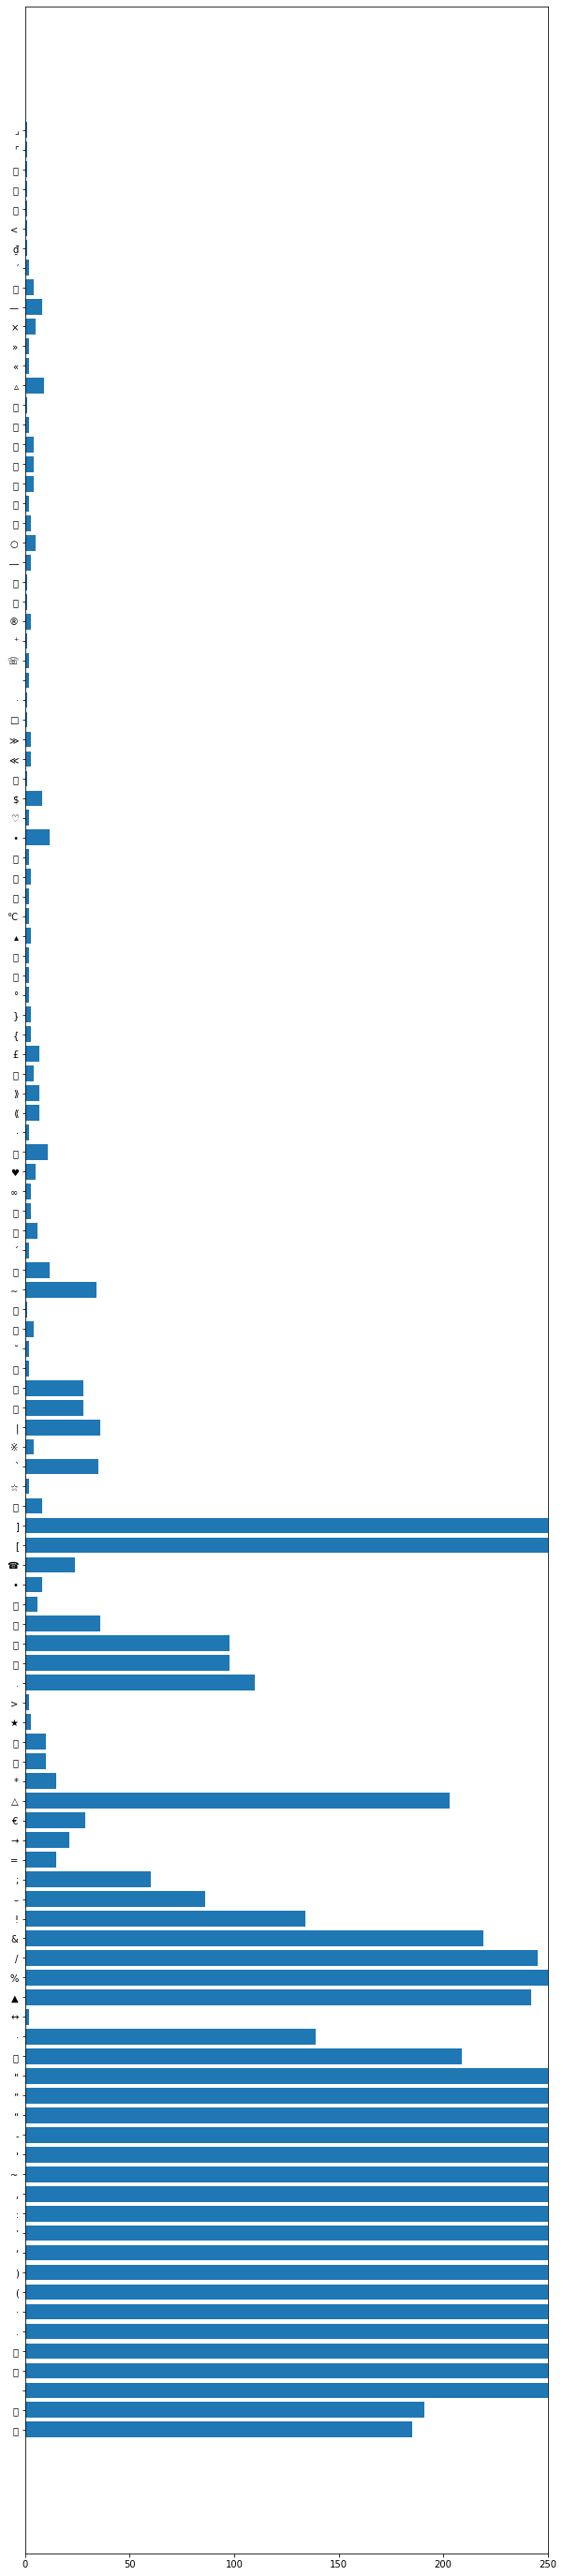

In [522]:
plt.figure(figsize=(10,50))
plt.barh(list(spec_dict.keys()), spec_dict.values())
plt.xlim(0, 250)
plt.show

In [560]:
cnt = 0
for sen in df.sentence:
    cnt += sen.count("#")

print(cnt)

0


In [306]:
slen_dict = {}

for sen in df.sentence:
    sen_len = len(sen)
    if sen_len in slen_dict:
        slen_dict[sen_len] += 1
    else:
        slen_dict[sen_len] = 1
        
print(slen_dict)
print('max_len =', max(*slen_dict.keys()))

{59: 326, 54: 297, 99: 269, 78: 373, 56: 299, 115: 202, 106: 244, 151: 95, 138: 115, 43: 204, 96: 274, 224: 21, 97: 289, 133: 145, 124: 176, 176: 53, 64: 367, 74: 377, 102: 253, 60: 354, 134: 135, 101: 281, 117: 206, 66: 324, 149: 95, 85: 325, 80: 347, 40: 154, 75: 324, 98: 294, 244: 13, 49: 293, 100: 292, 110: 224, 127: 168, 55: 311, 39: 161, 81: 333, 144: 95, 93: 336, 198: 31, 76: 368, 259: 9, 84: 322, 135: 129, 44: 214, 104: 258, 67: 369, 200: 29, 52: 263, 146: 92, 62: 391, 147: 99, 41: 216, 88: 315, 105: 257, 156: 79, 177: 38, 71: 354, 82: 359, 118: 205, 154: 94, 68: 367, 148: 82, 77: 367, 103: 266, 111: 246, 128: 150, 35: 120, 131: 137, 72: 363, 63: 328, 91: 302, 90: 264, 191: 31, 120: 167, 28: 24, 140: 118, 139: 103, 123: 174, 92: 311, 89: 321, 199: 32, 45: 220, 173: 52, 69: 395, 136: 124, 95: 306, 150: 96, 205: 16, 83: 340, 53: 293, 108: 254, 165: 68, 30: 66, 79: 413, 48: 269, 113: 212, 34: 97, 73: 340, 130: 143, 178: 44, 57: 315, 230: 10, 143: 99, 107: 195, 142: 100, 50: 251, 4

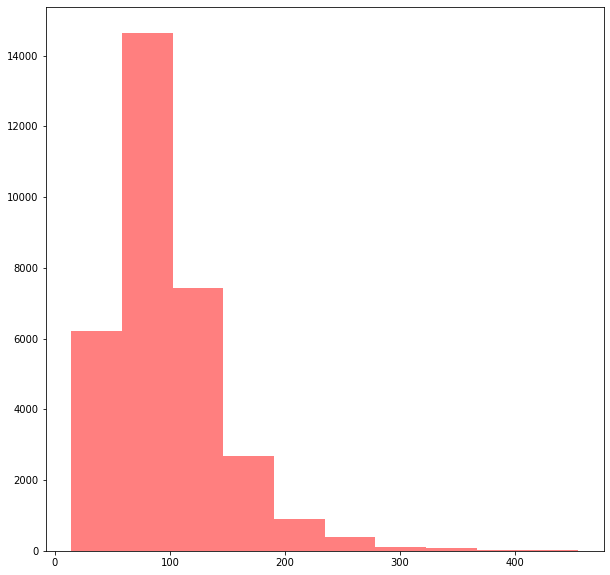

In [427]:
plt.figure(figsize=(10,10))
plt.hist(df.sentence.str.len(), alpha=0.5, color='red',label = 'before tokenize')
plt.show()

In [383]:
def preprocessing_dataset(dataset):
  """ 처음 불러온 csv 파일을 원하는 형태의 DataFrame으로 변경 시켜줍니다."""
  subject_entity = []
  object_entity = []
  for i,j in zip(dataset['subject_entity'], dataset['object_entity']):
    i = i[1:-1].split(',')[0].split(':')[1]
    j = j[1:-1].split(',')[0].split(':')[1]

    subject_entity.append(i)
    object_entity.append(j)
  out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label'],})
  return out_dataset

def load_data(dataset_dir):
  """ csv 파일을 경로에 맡게 불러 옵니다. """
  pd_dataset = pd.read_csv(dataset_dir)
  dataset = preprocessing_dataset(pd_dataset)
  
  return dataset

def tokenized_dataset(dataset, tokenizer):
  """ tokenizer에 따라 sentence를 tokenizing 합니다."""
  concat_entity = []
  for e01, e02 in zip(dataset['subject_entity'], dataset['object_entity']):
    temp = ''
    temp = e01 + '[SEP]' + e02
    concat_entity.append(temp)
  tokenized_sentences = tokenizer(
      concat_entity,
      list(dataset['sentence']),
      return_tensors="pt",
      padding=True,
      truncation=True,
      max_length=256,
      add_special_tokens=True,
      )
  return tokenized_sentences


In [1217]:
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification, Trainer, TrainingArguments, RobertaConfig, RobertaTokenizer, RobertaForSequenceClassification, BertTokenizer

MODEL_NAME = "klue/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [1218]:
train_dataset = load_data("../dataset/train/train.csv")
tokenized_train = tokenized_dataset(train_dataset, tokenizer)

In [1219]:
print(*tokenized_train.input_ids[:5])

tensor([    0,    11, 29830,    11,     2,    11,  8373, 14113,  2234,    11,
            2,   168, 30985, 14451,  7088,  4586,   169,   793,  8373, 14113,
         2234,  2052,  1363,  2088, 29830,  2116, 14879,  2440,  6711,   170,
        21406, 26713,  2076, 25145,  5749,   171,  1421,   818,  2073,  4388,
         2062,    18,     2,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1, 

In [1220]:
len(tokenized_train.input_ids)

32470

In [1221]:
print(*tokenized_train)

input_ids token_type_ids attention_mask


In [1222]:
print(tokenized_train.token_type_ids[0])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0])


In [1223]:
tokenized_train.attention_mask[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0])

In [1224]:
input_ids_df = pd.DataFrame(tokenized_train.input_ids.numpy())

In [1225]:
input_ids_np = tokenized_train.input_ids.numpy()

In [1226]:
input_ids_pd = pd.DataFrame(input_ids_np)

In [1227]:
input_ids_pd

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,0,11,29830,11,2,11,8373,14113,2234,11,...,1,1,1,1,1,1,1,1,1,1
1,0,11,3772,2139,2267,2481,11,2,11,5605,...,1,1,1,1,1,1,1,1,1,1
2,0,11,4104,10904,11,2,11,3629,17287,20212,...,1,1,1,1,1,1,1,1,1,1
3,0,11,27930,24393,2024,11,2,11,6580,2144,...,1,1,1,1,1,1,1,1,1,1
4,0,11,20289,20562,11,2,11,14925,11,2,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32465,0,11,5967,2456,11,2,11,3902,5905,100,...,1,1,1,1,1,1,1,1,1,1
32466,0,11,28246,2444,11,2,11,1284,2394,2364,...,1,1,1,1,1,1,1,1,1,1
32467,0,11,18272,2242,11,2,11,31102,2313,11,...,1,1,1,1,1,1,1,1,1,1
32468,0,11,15710,11,2,11,4097,2827,2500,2255,...,1,1,1,1,1,1,1,1,1,1


In [1231]:
((input_ids_pd==3).sum(axis=1)!=0)

0        False
1        False
2        False
3        False
4        False
         ...  
32465    False
32466    False
32467    False
32468    False
32469    False
Length: 32470, dtype: bool

In [1288]:
((input_ids_pd==3).sum(axis=1)!=0).sum(axis=0)

3218

In [1232]:
((input_ids_pd==3).sum(axis=1)).value_counts()

0     29252
1      1256
2      1066
3       480
4       189
5       110
6        58
8        28
7        22
10        4
12        2
9         2
11        1
dtype: int64

In [1289]:
UNK_over_n = 9

condition = ((input_ids_pd==3).sum(axis=1)>UNK_over_n)

sen_id = iter(df.index[condition])
UNK_count = iter(((input_ids_pd==1).sum(axis=1))[condition])
UNK_sentence = iter(df.sentence[condition])
UNK_sub = iter(df.subject_entity[condition])
UNK_obj = iter(df.object_entity[condition])
UNK_ids = iter(tokenized_train.input_ids[condition])

In [1291]:
print('sentence id :', next(sen_id))
print('UNK count :', next(UNK_count))
print(next(UNK_sub))
print(next(UNK_obj))
print(next(UNK_sentence))
print(next(UNK_ids))

sentence id : 8982
UNK count : 176
{'word': '우거왕', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}
{'word': '위우거(衛右渠)', 'start_idx': 45, 'end_idx': 52, 'type': 'PER'}
우거왕(右渠王, 기원전 160년 ~ 기원전 108년, ~ 기원전 108년) 또는 위우거(衛右渠)는 고조선의 마지막 왕으로 위만(衛滿)의 손자이다.
tensor([    0,    11,  1469,  2180,  2305,    11,     2,    11,  1485,  2137,
         2180,    12,     3,     3,     3,    13,    11,     2,  1469,  2180,
         2305,    12,     3,     3,   429,    16, 11561,  9712,  2440,    97,
        11561, 12309,  2440,    16,    97, 11561, 12309,  2440,    13,  4013,
         1485,  2137,  2180,    12,     3,     3,     3,    13,   793, 23452,
         2079,  4178,  1459,  6233,  1485,  2154,    12,     3,     3,    13,
         1503, 10055, 28674,    18,     2,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,   

In [1292]:
df.label[(input_ids_pd==3).sum(axis=1)>3].value_counts()

no_relation                        77
per:alternate_names                68
org:alternate_names                37
per:date_of_death                  30
per:date_of_birth                  28
per:origin                         25
per:parents                        20
per:employee_of                    19
per:spouse                         18
per:title                          18
per:children                       12
org:member_of                      10
org:place_of_headquarters           9
org:top_members/employees           8
per:other_family                    8
org:founded                         5
per:siblings                        4
per:colleagues                      4
per:place_of_birth                  3
per:place_of_residence              3
per:product                         3
org:members                         3
per:place_of_death                  1
org:founded_by                      1
per:religion                        1
org:number_of_employees/members     1
Name: label,

In [1236]:
df.label[(input_ids_pd==3).sum(axis=1)>3].value_counts()/df.label.value_counts(), df.label.value_counts()

(no_relation                            0.008076
 org:alternate_names                    0.028030
 org:dissolved                               NaN
 org:founded                            0.011111
 org:founded_by                         0.006452
 org:member_of                          0.005359
 org:members                            0.007143
 org:number_of_employees/members        0.020833
 org:place_of_headquarters              0.007531
 org:political/religious_affiliation         NaN
 org:product                                 NaN
 org:top_members/employees              0.001867
 per:alternate_names                    0.067932
 per:children                           0.039474
 per:colleagues                         0.007491
 per:date_of_birth                      0.024779
 per:date_of_death                      0.071770
 per:employee_of                        0.005318
 per:origin                             0.020259
 per:other_family                       0.042105
 per:parents        

In [1237]:
df_droped = df.drop(labels=df.index[(input_ids_pd==3).sum(axis=1)>3], axis=0)

In [1238]:
df_droped.iloc[4597]

id                                                                                                      4658
sentence          하이트진로(대표 김인규)가 지난해 11월 싱가포르에 이어 미국에서 본격적으로 해외 기업설명회(NDR: Non-Deal Roadshow)에 나선다고 18일 밝혔다.
subject_entity                                {'word': '하이트진로', 'start_idx': 0, 'end_idx': 4, 'type': 'ORG'}
object_entity                                  {'word': '김인규', 'start_idx': 9, 'end_idx': 11, 'type': 'PER'}
label                                                                              org:top_members/employees
source                                                                                              wikitree
Name: 4658, dtype: object

In [1239]:
df_droped

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}","{'word': '대안신당', 'start_idx': 14, 'end_idx': 17, 'type': 'ORG'}",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}","{'word': '박정부', 'start_idx': 22, 'end_idx': 24, 'type': 'PER'}",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8번으로 배정되었다.,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}","{'word': '1967', 'start_idx': 0, 'end_idx': 3, 'type': 'DAT'}",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,"한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등록 마감 결과, 강석호(3선·경북 영양·영덕·봉화·울진)-이장우(재선·대전 동구), 유기준(4선·부산 서구·동구)-박성중(초선·서울 서초을), 김선동(재선·서울 도봉을)-김종석(초선·비례), 심재철(5선·경기 안양시동안구을)-김재원(3선·경북 상주·군위·의성·청송) 등 4개 조가 등록했다고 밝혔다.","{'word': '유기준', 'start_idx': 93, 'end_idx': 95, 'type': 'PER'}","{'word': '부산 서구·동구', 'start_idx': 100, 'end_idx': 107, 'type': 'LOC'}",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을 지도자로 하는 남접으로 나뉘게 된다.","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}","{'word': '손병희', 'start_idx': 17, 'end_idx': 19, 'type': 'PER'}",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 229개 기초지자체 중 최상위 등급인 A등급을 받으면서 전국에서 가장 높은 교통안전 인식 수준을 갖고 있는 것으로 나타났다.,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이사장, 한국기원 총재를 맡고 있다.","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9, 'type': 'ORG'}","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': 25, 'type': 'ORG'}",no_relation,wikipedia


In [1270]:
l_withoutpad = []

for tokenized_sen in tokenized_train.input_ids[:100]:
    l_withoutpad.append(len(tokenized_sen) - list(tokenized_sen).count(1))

print(l_withoutpad[:100])

[43, 49, 61, 55, 38, 67, 62, 71, 89, 77, 36, 62, 128, 65, 81, 78, 102, 49, 54, 60, 36, 74, 66, 67, 45, 90, 65, 58, 38, 50, 64, 73, 146, 39, 70, 71, 46, 78, 66, 53, 36, 52, 85, 61, 116, 58, 62, 55, 150, 45, 55, 81, 57, 55, 41, 63, 53, 111, 41, 90, 51, 86, 38, 94, 61, 64, 93, 113, 48, 59, 39, 51, 56, 75, 100, 48, 73, 57, 87, 79, 47, 55, 59, 71, 72, 78, 32, 87, 91, 45, 50, 59, 76, 66, 68, 51, 38, 56, 41, 86]


In [1273]:
# baseline 활용시 count_nonzero 를 빼줘서 길이를 구했었는데 klue/roberta-large 는 패딩이 1 으로 처리되서 문제 발생

In [1271]:
sorted(l_withoutpad, reverse=1)[:50]

[150,
 146,
 128,
 116,
 113,
 111,
 102,
 100,
 94,
 93,
 91,
 90,
 90,
 89,
 87,
 87,
 86,
 86,
 85,
 81,
 81,
 79,
 78,
 78,
 78,
 77,
 76,
 75,
 74,
 73,
 73,
 72,
 71,
 71,
 71,
 70,
 68,
 67,
 67,
 66,
 66,
 66,
 65,
 65,
 64,
 64,
 63,
 62,
 62,
 62]

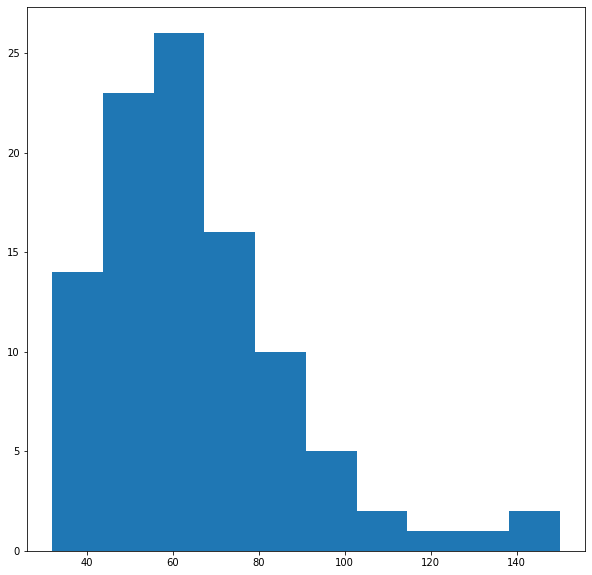

In [1262]:
plt.figure(figsize=(10,10))
plt.hist(l_withoutpad)
plt.show()

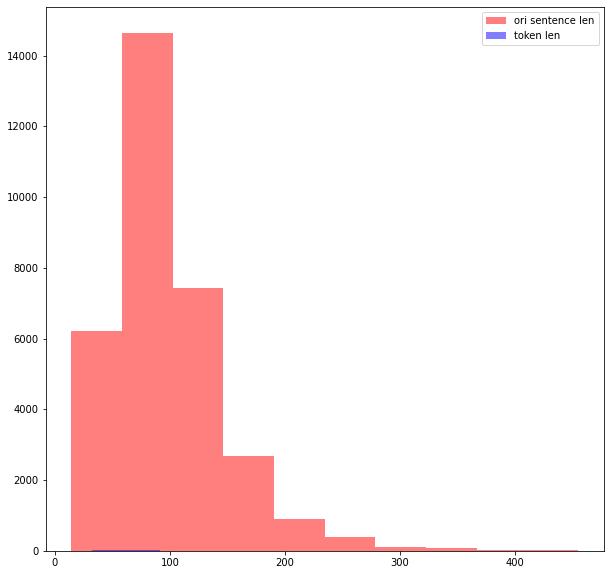

In [1263]:
plt.figure(figsize=(10,10))
plt.hist(df.sentence.str.len(), alpha=0.5, color='red',label = 'ori sentence len')
plt.hist(l_withoutpad, alpha=0.5, color='blue',label = 'token len')
plt.legend()
plt.show()

In [1264]:
tkn = pd.Series(l_withoutpad)

In [1265]:
tkn[tkn>150]

Series([], dtype: int64)

In [451]:
sum(tkn>150)

320

In [456]:
df.label[tkn>150]

204            org:alternate_names
254                    no_relation
300      org:top_members/employees
352                    no_relation
532                    no_relation
                   ...            
31831                  no_relation
32210                  no_relation
32300                  no_relation
32351                  org:members
32400                  no_relation
Name: label, Length: 320, dtype: object

In [459]:
df.label[tkn>150].value_counts()

no_relation                        145
per:employee_of                     34
org:top_members/employees           22
per:title                           19
org:alternate_names                 18
org:member_of                       18
per:alternate_names                 10
per:colleagues                       7
per:parents                          7
org:members                          7
per:origin                           6
per:children                         5
per:spouse                           4
per:date_of_birth                    3
org:place_of_headquarters            3
org:product                          2
per:date_of_death                    2
per:product                          2
org:founded                          2
per:other_family                     1
org:number_of_employees/members      1
per:schools_attended                 1
per:place_of_residence               1
Name: label, dtype: int64

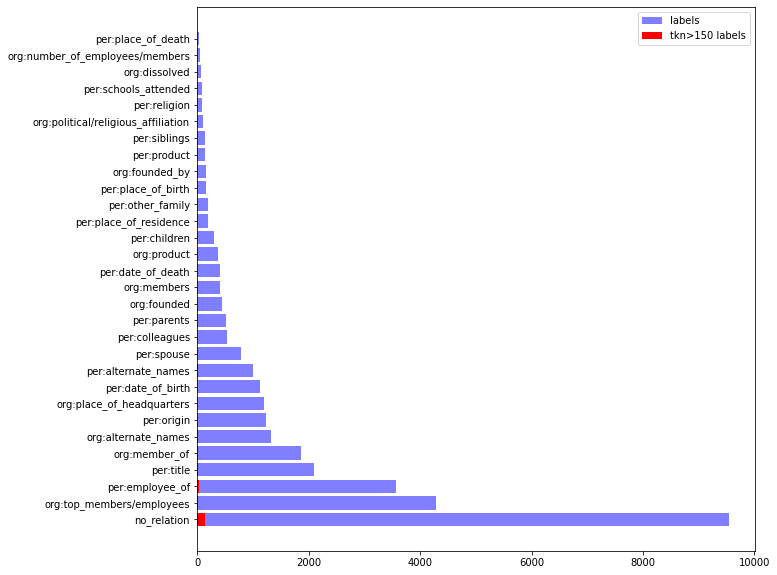

In [483]:
plt.figure(figsize=(10,10))
plt.barh(values.index, values, alpha=0.5, color='blue', label='labels')
plt.barh(df.label[tkn>150].value_counts().index, df.label[tkn>150].value_counts(), 
         alpha=1, color='red', label='tkn>150 labels')
plt.legend()
plt.show()

In [480]:
len(df.label[tkn>150].value_counts().index)

23

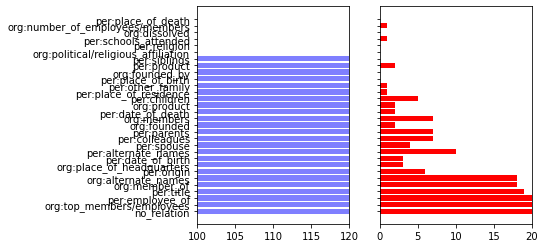

In [488]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # 그래프 두 개를 한 figure 내에 그리기
fig.subplots_adjust(hspace = 0.05) # 두 그래프 사이의 상하 간격 설정

# 각각의 그래프 그리기
ax1.barh(values.index, values, alpha=0.5, color='blue', label='labels')
ax2.barh(df.label[tkn>150].value_counts().index, df.label[tkn>150].value_counts(), 
         alpha=1, color='red', label='tkn>150 labels')

ax1.set_xlim(100, 120) # 윗 부분 y축 범위 설정
ax2.set_xlim(0, 20) # 아랫 부분 y축 범위 설정

plt.show()

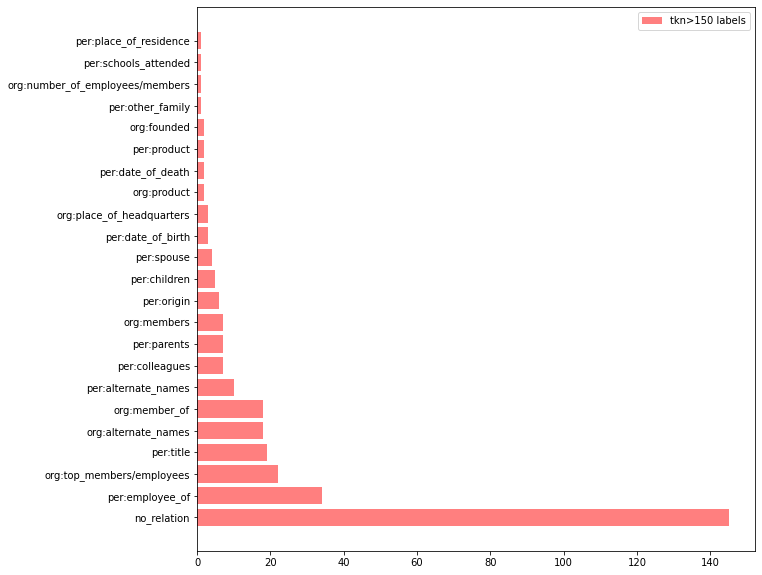

In [495]:
plt.figure(figsize=(10,10))
plt.barh(df.label[tkn>150].value_counts().index, df.label[tkn>150].value_counts(), 
         alpha=0.5, color='red', label='tkn>150 labels')
plt.legend()
plt.show()

In [498]:
df.label[tkn>150].value_counts()

no_relation                        145
per:employee_of                     34
org:top_members/employees           22
per:title                           19
org:alternate_names                 18
org:member_of                       18
per:alternate_names                 10
per:colleagues                       7
per:parents                          7
org:members                          7
per:origin                           6
per:children                         5
per:spouse                           4
per:date_of_birth                    3
org:place_of_headquarters            3
org:product                          2
per:date_of_death                    2
per:product                          2
org:founded                          2
per:other_family                     1
org:number_of_employees/members      1
per:schools_attended                 1
per:place_of_residence               1
Name: label, dtype: int64

In [497]:
values

no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

In [500]:
(df.label[tkn>150].value_counts() / values)

no_relation                            0.015209
org:alternate_names                    0.013636
org:dissolved                               NaN
org:founded                            0.004444
org:founded_by                              NaN
org:member_of                          0.009646
org:members                            0.016667
org:number_of_employees/members        0.020833
org:place_of_headquarters              0.002510
org:political/religious_affiliation         NaN
org:product                            0.005263
org:top_members/employees              0.005135
per:alternate_names                    0.009990
per:children                           0.016447
per:colleagues                         0.013109
per:date_of_birth                      0.002655
per:date_of_death                      0.004785
per:employee_of                        0.009516
per:origin                             0.004862
per:other_family                       0.005263
per:parents                            0

In [499]:
(df.label[tkn>150].value_counts() / values)[values<100]

org:dissolved                               NaN
org:number_of_employees/members        0.020833
org:political/religious_affiliation         NaN
per:place_of_death                          NaN
per:religion                                NaN
per:schools_attended                   0.012195
Name: label, dtype: float64

## 언노운 토큰 많은 문장 확인해 보기

## tokenized sentence UNK 토큰 수 3개 초과한 데이터 drop 한 결과 csv 로 저장

In [901]:
df_droped.to_csv('train_drop_unk_over_3.csv')

In [1274]:
from sklearn.model_selection import train_test_split

data = df_droped
target = df_droped['label']

# train_test_split
df_droped_train, df_droped_valid = train_test_split(data, test_size=0.2, shuffle=True, stratify=target, random_state=2023)

In [1275]:
df_droped_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25643 entries, 23908 to 8343
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              25643 non-null  int64 
 1   sentence        25643 non-null  object
 2   subject_entity  25643 non-null  object
 3   object_entity   25643 non-null  object
 4   label           25643 non-null  object
 5   source          25643 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [1276]:
df_droped_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6411 entries, 10920 to 19363
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6411 non-null   int64 
 1   sentence        6411 non-null   object
 2   subject_entity  6411 non-null   object
 3   object_entity   6411 non-null   object
 4   label           6411 non-null   object
 5   source          6411 non-null   object
dtypes: int64(1), object(5)
memory usage: 350.6+ KB


In [1277]:
df_droped_train.to_csv('roberta-large_unk_3_train.csv')
df_droped_valid.to_csv('roberta-large_unk_3_dev.csv')

In [1278]:
df_droped_valid.label.value_counts()/(df_droped_train.label.value_counts()+df_droped_valid.label.value_counts())

no_relation                            0.200063
org:top_members/employees              0.199953
per:employee_of                        0.200056
per:title                              0.200000
org:member_of                          0.199892
org:alternate_names                    0.200312
per:origin                             0.200165
org:place_of_headquarters              0.199831
per:date_of_birth                      0.200544
per:alternate_names                    0.200429
per:spouse                             0.199485
per:colleagues                         0.200000
per:parents                            0.200000
org:founded                            0.200000
org:members                            0.199041
per:date_of_death                      0.201031
org:product                            0.200000
per:children                           0.198630
per:place_of_residence                 0.200000
per:other_family                       0.197802
per:place_of_birth                     0

In [954]:
def sub_obj(dataset):
  """ 처음 불러온 csv 파일을 원하는 형태의 DataFrame으로 변경 시켜줍니다."""
  subject_entity = []
  object_entity = []
  for i,j in zip(dataset['subject_entity'], dataset['object_entity']):
    i = i[1:-1].split(',')[0].split(':')[1].lstrip(" '").rstrip("'")
    j = j[1:-1].split(',')[0].split(':')[1].lstrip(" '").rstrip("'")
    subject_entity.append(i)
    object_entity.append(j)
    
  return subject_entity, object_entity

In [955]:
df_sub, df_obj = sub_obj(df)

In [956]:
df_sub = pd.Series(df_sub)

In [958]:
df_sub

0              비틀즈
1            민주평화당
2             광주FC
3            아성다이소
4        요미우리 자이언츠
           ...    
32465          유기준
32466          최시형
32467          완도군
32468         JTBC
32469          화순군
Length: 32470, dtype: object

In [959]:
df_obj = pd.Series(df_obj)

In [960]:
df_obj

0          조지 해리슨
1            대안신당
2        한국프로축구연맹
3             박정부
4            1967
           ...   
32465    부산 서구·동구
32466         손병희
32467         신우철
32468       중앙홀딩스
32469         구충곤
Length: 32470, dtype: object

In [961]:
sub_in_sen = []
obj_in_sen = []

for sen, sub, obj in zip(df.sentence, df_sub, df_obj):
    sub_in_sen.append(sen.count(sub))
    obj_in_sen.append(sen.count(obj))

In [964]:
sub_in_sen = pd.Series(sub_in_sen)
obj_in_sen = pd.Series(obj_in_sen)

In [972]:
sum(sub_in_sen>1)

3066

In [973]:
sub_over_2 = df[sub_in_sen>1]

In [975]:
sub_over_2

,id,sentence,subject_entity,object_entity,label,source
8,8,"중공군에게 온전히 대항할 수 없을 정도로 약해진 국민당은 타이베이로 수도를 옮기는 것을 결정해, 남아있는 중화민국군의 병력이나 국가, 개인의 재산등을 속속 타이완으로 옮기기 시작해, 12월에는 중앙 정부 기구도 모두 이전해 타이베이 시를 중화민국의 새로운 수도로 삼았다.","{'word': '중화민국', 'start_idx': 59, 'end_idx': 62, 'type': 'ORG'}","{'word': '타이베이', 'start_idx': 32, 'end_idx': 35, 'type': 'LOC'}",org:place_of_headquarters,wikipedia
23,23,스포츠계에서도 막강한 영향력을 펼치고 있어 2008년 9월 만수르 빈 자이드 알나하얀 소유의 에 맨체스터 시티 FC의 인수를 제안했고 인수 완료 후 잉글랜드 프리미어리그의 맨체스터 시티 FC의 구단주가 되었다.,"{'word': '맨체스터 시티 FC', 'start_idx': 96, 'end_idx': 105, 'type': 'ORG'}","{'word': '프리미어리그', 'start_idx': 88, 'end_idx': 93, 'type': 'ORG'}",org:member_of,wikipedia
51,51,"새정치국민회의는 한나라당 내 민주계 의원들을, 자유민주연합은 민정계 의원들을 각각 접촉하여 반란 표를 부탁했으며, 한나라당은 반대로 자유민주연합 내 충청권 의원들을 접촉하여 ""국회의장을 내주지 않으면 총리 인준도 없다""는 식의 압박을 가했다.","{'word': '자유민주연합', 'start_idx': 26, 'end_idx': 31, 'type': 'ORG'}","{'word': '한나라당', 'start_idx': 9, 'end_idx': 12, 'type': 'ORG'}",no_relation,wikipedia
61,61,"한편 서정성 예비후보는 문재인 대통령직속 국가균형발전위원회 국민소통 특별위원과 더불어민주당 국민통합위원회 부위원장으로 활동하며 문재인 정부의 소통 창구 역할과 더불어 광주 남구의사회장, 아이안과 대표원장 및 민족화해협력범국민협의회 의료보건위원장으로 활동하고 있다.","{'word': '문재인', 'start_idx': 71, 'end_idx': 73, 'type': 'PER'}","{'word': '더불어민주당', 'start_idx': 44, 'end_idx': 49, 'type': 'ORG'}",no_relation,wikitree
65,65,김종식 목포시장을 비롯한 목포시청 직원 150여명은 2020학년도 대학수학능력시험이 치러진 14일 아침 목포마리아회고등학교를 비롯한 7개 시험장을 찾아 수험생을 응원하고 학부모를 격려했다.,"{'word': '목포시', 'start_idx': 14, 'end_idx': 16, 'type': 'ORG'}","{'word': '김종식', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}",org:top_members/employees,wikitree
...,...,...,...,...,...,...
32416,32416,"광주ㆍ호남 지역에서 신세계백화점과 이마트를 운영하는 별도의 법인으로, 신세계ㆍ이마트 계열사지만 직접 자회사로 포함되지는 않고 현지에서 별도로 운영된다.","{'word': '신세계', 'start_idx': 11, 'end_idx': 13, 'type': 'ORG'}","{'word': '이마트', 'start_idx': 19, 'end_idx': 21, 'type': 'ORG'}",no_relation,wikipedia
32417,32417,강원도 평창군은 오는 28일부터 내년 2월 2일까지 평창군 진부면 오대천 일원에서 송어축제를 진행한다.,"{'word': '평창군', 'start_idx': 4, 'end_idx': 6, 'type': 'ORG'}","{'word': '강원도', 'start_idx': 0, 'end_idx': 2, 'type': 'LOC'}",org:member_of,wikitree
32420,32420,"그러나 김양상의 친형제로 보기는 어렵고 사촌형제라고 보기도 어려운데, 이는 삼국사기, 삼국유사의 원성왕조에 보면 원성왕 즉위 후 선덕왕의 할아버지인 원훈의 사당을 폐쇄한 기록이 있다.","{'word': '원성왕', 'start_idx': 63, 'end_idx': 65, 'type': 'PER'}","{'word': '선덕왕', 'start_idx': 72, 'end_idx': 74, 'type': 'PER'}",per:other_family,wikipedia
32429,32429,"다른 아들 고종후 역시 상중에 기복하여 다시 의병을 이끌고 진주성에서 싸우다가, 패하고 강물에 투신하여 자결했다. 고종후는 승정원도승지에 추증되었다.","{'word': '고종후', 'start_idx': 6, 'end_idx': 8, 'type': 'PER'}","{'word': '진주성', 'start_idx': 33, 'end_idx': 35, 'type': 'POH'}",no_relation,wikipedia


In [1158]:
subject_start = []
subject_end = []
subject_type = []

for i in df['subject_entity']:
    i = int(i[1:-1].split("'start_idx': ")[1].split(',')[0])

    subject_start.append(i)

for j in df['subject_entity']:
    j = int(j[1:-1].split("'end_idx': ")[1].split(',')[0])+1

    subject_end.append(j)
    
for k in df['subject_entity']:
    k = str(k[1:-1].split("'type': ")[1][1:4])

    subject_type.append(k)
    
subject_start = pd.Series(subject_start)
subject_end = pd.Series(subject_end)
subject_type = pd.Series(subject_type)

In [1159]:
df_sub_position = pd.DataFrame({'subject_start':subject_start, 'subject_end':subject_end, 'subject_type':subject_type})

In [1160]:
df_sub_position

,subject_start,subject_end,subject_type
0,24,27,ORG
1,19,24,ORG
2,21,25,ORG
3,13,18,ORG
4,22,31,ORG
...,...,...,...
32465,93,96,PER
32466,7,10,PER
32467,0,3,ORG
32468,6,10,ORG


In [1089]:
sub = []

for sen, i, j in zip(df.sentence, df_sub_position.subject_start, df_sub_position.subject_end):
    sub.append(sen[i:j])

In [1090]:
sub = pd.Series(sub)

In [1091]:
sub

0              비틀즈
1            민주평화당
2             광주FC
3            아성다이소
4        요미우리 자이언츠
           ...    
32465          유기준
32466          최시형
32467          완도군
32468         JTBC
32469          화순군
Length: 32470, dtype: object

In [1171]:
object_start = []
object_end = []
object_type = []

for i in df['object_entity']:
    i = int(i[1:-1].split("'start_idx': ")[1].split(',')[0])

    object_start.append(i)

for j in df['object_entity']:
    j = int(j[1:-1].split("'end_idx': ")[1].split(',')[0])+1

    object_end.append(j)
    
for k in df['object_entity']:
    k = str(k[1:-1].split("'type': ")[1][1:4])

    object_type.append(k)
    
object_start = pd.Series(object_start)
object_end = pd.Series(object_end)
object_type = pd.Series(object_type)

In [1172]:
df_obj_position = pd.DataFrame({'object_start':object_start, 'object_end':object_end, 'object_type':object_type})

In [1173]:
obj = []

for sen, i, j in zip(df.sentence, df_obj_position.object_start, df_obj_position.object_end):
    obj.append(sen[i:j])

In [1174]:
obj = pd.Series(obj)

In [1175]:
obj

0          조지 해리슨
1            대안신당
2        한국프로축구연맹
3             박정부
4            1967
           ...   
32465    부산 서구·동구
32466         손병희
32467         신우철
32468       중앙홀딩스
32469         구충곤
Length: 32470, dtype: object

In [1181]:
replace_sub = []

for sen, i, j, k, word in zip(df.sentence, df_sub_position.subject_start, df_sub_position.subject_end, df_sub_position.subject_type, sub):
    replace_sub.append(sen[:i]+f'@ {k} '+word+' @'+sen[j:])
    
replace_sub = pd.Series(replace_sub)

In [1182]:
replace_sub

0                                                                                                                                                                  〈Something〉는 조지 해리슨이 쓰고 @ ORG 비틀즈 @가 1969년 앨범 《Abbey Road》에 담은 노래다.
1                                                                                                                                                                       호남이 기반인 바른미래당·대안신당·@ ORG 민주평화당 @이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.
2                                                                                                                          K리그2에서 성적 1위를 달리고 있는 @ ORG 광주FC @는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.
3                                                                                                                                               균일가 생활용품점 (주)@ ORG 아성다이소 @(대표 박정부)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.
4                                                                           

In [1185]:
replace_sub_obj = []

for sen, i, j, k, word in zip(replace_sub, df_obj_position.object_start, df_obj_position.object_end, df_obj_position.object_type, obj):
    if sen[i:j]==word:
        replace_sub_obj.append(sen[:i]+f'# {k} '+word+' #'+sen[j:])
    else:
        replace_sub_obj.append(sen[:i+8]+f'# {k} '+word+' #'+sen[j+8:])
    
replace_sub_obj = pd.Series(replace_sub_obj)

In [1186]:
replace_sub_obj

0                                                                                                                                                                  〈Something〉는 # PER 조지 해리슨 #이 쓰고 @ ORG 비틀즈 @가 1969년 앨범 《Abbey Road》에 담은 노래다.
1                                                                                                                                                                       호남이 기반인 바른미래당·# ORG 대안신당 #·@ ORG 민주평화당 @이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.
2                                                                                                                          K리그2에서 성적 1위를 달리고 있는 @ ORG 광주FC @는 지난 26일 # ORG 한국프로축구연맹 #으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.
3                                                                                                                                               균일가 생활용품점 (주)@ ORG 아성다이소 @(대표 # PER 박정부 #)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.
4                                           

In [1187]:
df_label = df.label

In [1188]:
df_label

0                      no_relation
1                      no_relation
2                    org:member_of
3        org:top_members/employees
4                      no_relation
                   ...            
32465              per:employee_of
32466               per:colleagues
32467    org:top_members/employees
32468                  no_relation
32469    org:top_members/employees
Name: label, Length: 32470, dtype: object

In [1189]:
type(df_label)

pandas.core.series.Series

In [1190]:
df_replace_sub_obj = pd.DataFrame({'id':df.index, 'sentence':replace_sub_obj, 'label':df_label})

In [1282]:
df_replace_sub_obj

,id,sentence,label
0,0,〈Something〉는 # PER 조지 해리슨 #이 쓰고 @ ORG 비틀즈 @가 1969년 앨범 《Abbey Road》에 담은 노래다.,no_relation
1,1,호남이 기반인 바른미래당·# ORG 대안신당 #·@ ORG 민주평화당 @이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.,no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 @ ORG 광주FC @는 지난 26일 # ORG 한국프로축구연맹 #으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.,org:member_of
3,3,균일가 생활용품점 (주)@ ORG 아성다이소 @(대표 # PER 박정부 #)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.,org:top_members/employees
4,4,# DAT 1967 #년 프로 야구 드래프트 1순위로 @ ORG 요미우리 자이언츠 @에게 입단하면서 등번호는 8번으로 배정되었다.,no_relation
...,...,...,...
32465,32465,"한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등록 마감 결과, 강석호(3선·경북 영양·영덕·봉화·울진)-이장우(재선·대전 동구), @ PER 유기준 @(4선·# LOC 부산 서구·동구 #)-박성중(초선·서울 서초을), 김선동(재선·서울 도봉을)-김종석(초선·비례), 심재철(5선·경기 안양시동안구을)-김재원(3선·경북 상주·군위·의성·청송) 등 4개 조가 등록했다고 밝혔다.",per:employee_of
32466,32466,"법포는 다시 @ PER 최시형 @, 서병학, # PER 손병희 # 직계인 북접과 다시 서장옥, 전봉준, 김개남을 지도자로 하는 남접으로 나뉘게 된다.",per:colleagues
32467,32467,@ ORG 완도군 @(군수 # PER 신우철 #)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 229개 기초지자체 중 최상위 등급인 A등급을 받으면서 전국에서 가장 높은 교통안전 인식 수준을 갖고 있는 것으로 나타났다.,org:top_members/employees
32468,32468,"중앙일보, @ ORG JTBC @ 회장을 지낸 이후 # ORG 중앙홀딩스 # 회장, 재단법인 한반도평화만들기 이사장, 한국기원 총재를 맡고 있다.",no_relation


In [1192]:
data = df_replace_sub_obj
target = df_replace_sub_obj['label']

# train_test_split
df_replace_sub_obj_train, df_replace_sub_obj_valid = train_test_split(data, test_size=0.2, shuffle=True, stratify=target, random_state=2023)

df_replace_sub_obj_train.to_csv('replace_sub_obj_type_train.csv')
df_replace_sub_obj_valid.to_csv('replace_sub_obj_type_dev.csv')

In [1132]:
sub_type = []
for i in df.subject_entity:
    sub_type.append(i[-5:-2])
    
sub_type = pd.Series(sub_type)

In [1135]:
sub_type.value_counts()

PER    16786
ORG    15684
dtype: int64

In [1136]:
obj_type = []
for i in df.object_entity:
    obj_type.append(i[-5:-2])
    
obj_type = pd.Series(obj_type)

In [1137]:
obj_type.value_counts()

PER    9788
ORG    9346
POH    5113
DAT    4249
LOC    3561
NOH     413
dtype: int64

In [1152]:
test = pd.read_csv('../dataset/test/test_data.csv')

## \@ type entity \@ 에서 UNK > 3 인 행 삭제한 데이터 생성

In [1284]:
df_replace_sub_obj_droped = df_replace_sub_obj.drop(labels=df.index[(input_ids_pd==3).sum(axis=1)>3], axis=0)

In [1285]:
df_replace_sub_obj_droped.iloc[4597]

id                                                                                                                4658
sentence    @ ORG 하이트진로 @(대표 # PER 김인규 #)가 지난해 11월 싱가포르에 이어 미국에서 본격적으로 해외 기업설명회(NDR: Non-Deal Roadshow)에 나선다고 18일 밝혔다.
label                                                                                        org:top_members/employees
Name: 4658, dtype: object

In [1286]:
data = df_replace_sub_obj_droped
target = df_replace_sub_obj_droped['label']

# train_test_split
df_replace_sub_obj_droped_train, df_replace_sub_obj_droped_valid = train_test_split(data, test_size=0.2, shuffle=True, stratify=target, random_state=2023)

df_replace_sub_obj_droped_train.to_csv('replace_and_drop_train.csv')
df_replace_sub_obj_droped_valid.to_csv('replace_and_drop_dev.csv')